# Imports

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

**Loading Data**

In [9]:
vp = pd.read_csv('vpf.csv')
vp.head()

,Unnamed: 0,Name,Year,Math1,Physics1,EE,CO,ED,FEC1,Math2,Physics2,Chem,BME,Workshop,FEC2,CGB1,CGB2,CGA1,CGA2
0,0,kikat,2017.0,10,9,10,10,9,8,10,10,10,10,10,8,9.5,9.8,9.6,9.7
1,1,Gegetsuburi (Zanpakutō spirit),2017.0,10,10,10,10,8,6,9,10,10,9,7,9,9.4,9.2,9.1,9.5
2,2,Hanuma,2017.0,9,8,6,9,7,6,7,9,8,7,9,7,7.7,7.8,7.9,7.6
3,3,Yoshino Nara,2017.0,8,10,10,8,7,6,10,10,10,10,10,8,8.5,9.8,9.2,9.1
4,4,Hibari,2017.0,9,10,10,8,8,6,10,9,10,10,9,8,8.8,9.5,9.3,9.0


Functions

**Functions to be used** : **plot_graphs** : used to plot graphs for epochs vs loss, 
                            **NNpredict** : used to create and train a neural 4 layered neural network(64,32,16,1 nodes respectively),
                            **to_arr** :used to convert grades into array with numbers
                            

In [10]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
def NNpredict(X_train,X_test,y_train,y_test):
  model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, input_shape = [6], activation = 'relu'),
                            tf.keras.layers.Dense(32, activation = 'relu'),
                            tf.keras.layers.Dense(16, activation = 'relu'),
                            tf.keras.layers.Dense(1)])
  opt = tf.keras.optimizers.Adam(0.001)
  model.compile(loss = 'mse', optimizer = opt)
  history = model.fit(X_train,y_train, batch_size=X_train.shape[0],epochs=500, 
                    #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
                    validation_data=(X_test,y_test))
  return model, history, sklearn.metrics.r2_score(y_test,model.predict(X_test))
def to_arr(stri):
  grade2idx = {'F':0,'P':1,'C':2,'B':3,'B+':4,'A':5,'A+':6,'O':7}
  temp = stri.split(' ')
  temp = [grade2idx[i] for i in temp]
  return np.array(temp)  

### Model for sem1 B batch

In [13]:
X=vp[['Math1', 'Physics1', 'EE', 'CO', 'ED', 'FEC1']] # taking the semester 1 subjects for B batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']] this will be our predicted subjects
Y=vp['CGB2']
#X = X/28
# converting everything into array and splitting our data into train and test sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X,Y,test_size=0.2,random_state=101)
X_trainB = np.array(X_trainB)
X_testB = np.array(X_testB)
y_trainB = np.array(y_trainB)
y_testB = np.array(y_testB)

**Neural Network**



Epoch 1/500
1/1 [==============================] - 0s 102ms/step - loss: 8.6090 - val_loss: 5.7789
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 5.6093 - val_loss: 3.5778
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 3.4874 - val_loss: 2.1408
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 2.1089 - val_loss: 1.4203
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 1.4311 - val_loss: 1.3197
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 1.3587 - val_loss: 1.6312
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 1.6881 - val_loss: 2.0606
Epoch 8/500
1/1 [==============================] - 0s 17ms/step - loss: 2.1245 - val_loss: 2.3623
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 2.4278 - val_loss: 2.4400
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 2.5038 - val_loss: 2.3157
Epoch 11/500
1/1 [

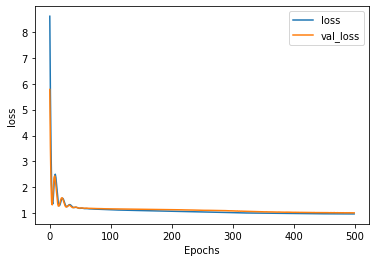

0.4316504927229007


In [14]:
m,h,r = NNpredict(X_trainB,X_testB,y_trainB,y_testB) # training neural network
plot_graphs(h,'loss') # plotting loss function
print(r) # printing r2 accuracy

In [15]:
prednn=m.predict(X_testB)
print(len(prednn))

647


**Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(X_trainB,y_trainB)
predictlr = lrmodel.predict(X_testB) # training linear regressor


In [17]:
print(sklearn.metrics.r2_score(y_testB,lrmodel.predict(X_testB)))
print(sklearn.metrics.r2_score(y_trainB,lrmodel.predict(X_trainB)))

0.4236345416239852
0.45801690528243477


**Support Vector Regressor**

In [18]:
from sklearn.svm import SVR
svrmodel=SVR()
svrmodel.fit(X_trainB,y_trainB)
predictsvr = svrmodel.predict(X_testB) # training support vector regressor

In [19]:
print(sklearn.metrics.r2_score(y_testB,svrmodel.predict(X_testB)))
print(sklearn.metrics.r2_score(y_trainB,svrmodel.predict(X_trainB)))

0.42518953528361747
0.4997280135636202


KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel=KNeighborsRegressor()
knnmodel.fit(X_trainB,y_trainB)
predictknn = knnmodel.predict(X_testB) # training KNN regressor

In [21]:
print(sklearn.metrics.r2_score(y_testB,knnmodel.predict(X_testB))) 
print(sklearn.metrics.r2_score(y_trainB,knnmodel.predict(X_trainB))) 


0.46152692985267907
0.6359005911710629


ADABOOST

In [22]:
from sklearn.ensemble import AdaBoostRegressor
adbmodel=AdaBoostRegressor()
adbmodel.fit(X_trainB,y_trainB)
predictadb = adbmodel.predict(X_testB) # training AdaBoost regressor

In [23]:
print(sklearn.metrics.r2_score(y_testB,adbmodel.predict(X_testB)))
print(sklearn.metrics.r2_score(y_trainB,adbmodel.predict(X_trainB)))

0.39947878366619105
0.4064553828265012


**Randmom Forest Regressor**

In [24]:
RFmodel = RandomForestRegressor(n_estimators=900) 
RFmodel.fit(X_trainB,y_trainB)
predictrf = RFmodel.predict(X_testB) # training random forest regressor


In [25]:
print(sklearn.metrics.r2_score(y_testB,RFmodel.predict(X_testB))) 
print(sklearn.metrics.r2_score(y_trainB,RFmodel.predict(X_trainB))) 

0.6707859982086705
0.9242618480386157


In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trainB,y_trainB) # making random forest regressor
predictrfrand = rf_random.predict(X_testB) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.5min finished


In [49]:
from sklearn.externals import joblib
joblib.dump(rf_random, "rf_B_optimized.pkl") 
my_model_loaded = joblib.load("rf_B_optimized.pkl")

In [28]:
print(sklearn.metrics.r2_score(y_testB,   rf_random.predict(X_testB)))
print(sklearn.metrics.r2_score(y_trainB,  rf_random.predict(X_trainB)))

0.6895596532180643
0.926957116926998


Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbrmodel=GradientBoostingRegressor()
gbrmodel.fit(X_trainB,y_trainB)
predictgbr = gbrmodel.predict(X_testB) # training Gradient Boosting regressor

In [30]:
print(sklearn.metrics.r2_score(y_testB,gbrmodel.predict(X_testB)))
print(sklearn.metrics.r2_score(y_trainB,gbrmodel.predict(X_trainB)))

0.4671152062249727
0.5384180409491339


#### ENSEMBLE

In [59]:
df1=pd.DataFrame()
df1['f1']=predictlr
df1['f2']=predictgbr
df1['f3']=predictsvr
df1['f4']=predictrfrand
df1['f5']=prednn
df1['l']=y_testB
df1.head()

,f1,f2,f3,f4,f5,l
0,5.671470,5.788697,5.688830,4.917058,5.424296,3.7
1,6.759800,6.821102,6.591826,7.021700,6.785369,6.7
2,7.301531,7.350622,7.397771,8.848017,7.288290,9.5
3,7.113331,7.268155,6.864422,7.289564,7.322757,6.1
4,8.038928,8.282809,8.238469,8.046467,8.018075,7.2


In [62]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]
y.head()
x1, x2, y1, y2= train_test_split(x,y,test_size=0.4,random_state=101)
from sklearn.linear_model import LinearRegression
lrmodel1=LinearRegression()
lrmodel1.fit(x1,y1)
sklearn.metrics.r2_score(y2,lrmodel1.predict(x2))

0.6969954501540173

## Model for sem1A batch

In [31]:
## now we have to do sem 1 b batch separately because of difference in subjects ##
X=vp[['Math1', 'Physics1', 'Chem', 'BME', 'Workshop', 'FEC1']] # taking the semester 1 subjects for A batch from our dataset
#Y = Final[['Math2', 'Physics2', 'Chem', 'BME', 'Workshop', 'FEC2']]

Y=vp['CGA2']
# converting everything to arrays and splitting our data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.3,random_state=101)
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

**Neural Network**

Epoch 1/500
1/1 [==============================] - 0s 102ms/step - loss: 48.8693 - val_loss: 42.6971
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 42.1506 - val_loss: 36.1680
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 35.7118 - val_loss: 30.2317
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 29.8338 - val_loss: 25.0946
Epoch 5/500
1/1 [==============================] - 0s 18ms/step - loss: 24.7316 - val_loss: 20.6122
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 20.2885 - val_loss: 16.6270
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 16.3514 - val_loss: 13.0957
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 12.8692 - val_loss: 10.0176
Epoch 9/500
1/1 [==============================] - 0s 19ms/step - loss: 9.8382 - val_loss: 7.3981
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 7.2599 - val_loss: 5.2412
Ep

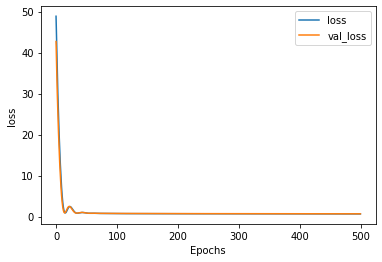

0.618524833688928


In [32]:
m,h,r = NNpredict(X_train2,X_test2,y_train2,y_test2) # training neural network
plot_graphs(h,'loss') #plotting loss graph
print(r) # prining r2 score

In [33]:
predictnn2=m.predict(X_test2)

**Linear Regressor**

In [34]:
from sklearn.linear_model import LinearRegression
lrmodel2=LinearRegression()
lrmodel2.fit(X_train2,y_train2)
predictlr2 = lrmodel2.predict(X_test2) # training linear regressor

In [35]:
print(sklearn.metrics.r2_score(y_test2,lrmodel2.predict(X_test2)))
print(sklearn.metrics.r2_score(y_train2,lrmodel2.predict(X_train2)))

0.6263968841474642
0.6503991697541729


**Support Vector Regressor**

In [36]:
from sklearn.svm import SVR
svrmodel2=SVR()
svrmodel2.fit(X_train2,y_train2)
predictsvr2 = svrmodel2.predict(X_test2) # training support vector regressor

In [37]:
print(sklearn.metrics.r2_score(y_test2,svrmodel2.predict(X_test2)))
print(sklearn.metrics.r2_score(y_train2,svrmodel2.predict(X_train2)))

0.6170843051045032
0.6848597167841399


KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel2=KNeighborsRegressor()
knnmodel2.fit(X_train2,y_train2)
predictknn2 = knnmodel2.predict(X_test2) # training KNN regressor

In [39]:
print(sklearn.metrics.r2_score(y_test2,knnmodel2.predict(X_test2)))
print(sklearn.metrics.r2_score(y_train2,knnmodel2.predict(X_train2)))

0.5895647484820485
0.7390600504072775


**ADABOOST**

In [40]:
from sklearn.ensemble import AdaBoostRegressor
adbmodel2=AdaBoostRegressor()
adbmodel2.fit(X_train2,y_train2)
predictadb2 = adbmodel2.predict(X_test2) # training AdaBoost regressor


In [41]:
print(sklearn.metrics.r2_score(y_test2,adbmodel2.predict(X_test2)))
print(sklearn.metrics.r2_score(y_train2,adbmodel2.predict(X_train2)))

0.5616650994003165
0.5918717505900204


**Random Forest**

In [42]:
RFmodel2 = RandomForestRegressor(n_estimators=900)
RFmodel2.fit(X_train2,y_train2) # making random forest regressor
predictrf2 = RFmodel2.predict(X_test2) 

In [43]:
print(sklearn.metrics.r2_score(y_test2,RFmodel2.predict(X_test2))) 
print(sklearn.metrics.r2_score(y_train2,RFmodel2.predict(X_train2))) 

0.6672925609843141
0.9443790983147142


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(X_train2,y_train2) # making random forest regressor
predict = rf_random2.predict(X_test2) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


In [46]:
print(sklearn.metrics.r2_score(y_test2,rf_random2.predict(X_test2)))
print(sklearn.metrics.r2_score(y_train2,rf_random2.predict(X_train2)))
predictrfrand2 = rf_random2.predict(X_test2)

0.6836525168721266
0.9469109396348587


In [48]:
from sklearn.externals import joblib
joblib.dump(rf_random2, "rf_A_optimized.pkl") 
my_model_loaded = joblib.load("rf_A_optimized.pkl")

Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbrmodel2=GradientBoostingRegressor()
gbrmodel2.fit(X_train2,y_train2)
predictgbr2 = gbrmodel2.predict(X_test2) # training Gradient Boosting regressor
print(sklearn.metrics.r2_score(y_test2,gbrmodel2.predict(X_test2))) # r2 score of Gradient Boosting regressor
print(sklearn.metrics.r2_score(y_train2,gbrmodel2.predict(X_train2)))

0.6289202840307022
0.6993573583939822


**Using our models to make a Custom Prediction**

In [52]:
stri = input() # input your custom grades 
arr = to_arr(stri)
RFmodel.predict([arr])[0] # making our first custom prediction

KeyboardInterrupt: ignored

In [53]:
pr=(predictlr2+predictgbr2+predictsvr2+predictrfrand2)/4
sklearn.metrics.r2_score(y_test2,pr)

0.6563520634642175

In [54]:
df=pd.DataFrame()
df['f1']=predictlr2
df['f2']=predictgbr2
df['f3']=predictsvr2
df['f4']=predictrfrand2
df['f5']=predictnn2
df['l']=y_test2
df.head()

,f1,f2,f3,f4,f5,l
0,4.746059,4.834714,4.497220,4.404706,4.435067,4.1
1,6.951979,7.075814,6.908167,7.183721,7.011200,6.1
2,8.216078,8.461642,8.428119,8.614707,8.299201,8.6
3,6.604057,6.303044,6.675528,6.900967,6.638798,6.8
4,8.048497,8.051295,8.123513,7.882732,8.044033,7.4


In [55]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
y.head()

,l
0,4.1
1,6.1
2,8.6
3,6.8
4,7.4


In [56]:
x1, x2, y1, y2= train_test_split(x,y,test_size=0.4,random_state=101)

from sklearn.linear_model import LinearRegression

lrmodel3=LinearRegression()
lrmodel3.fit(x1,y1)
sklearn.metrics.r2_score(y2,lrmodel3.predict(x2))

0.7192085660828655